In [19]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os
from PIL import Image
import json

# expects fretboard dataset to be in data folder on same level as tabs_generator folder
train_str = "train" # change to train or test to perform on respective data
dataset_path = "../data/fretboard_dataset/"
images_path = f"../data/fretboard_dataset/fretboard_frames_{train_str}/"
json_fn = os.path.join(dataset_path, f"fretboard_labels_{train_str}_vgg.json")
fns = os.listdir(images_path)
image_fns = [fn for fn in fns if not "annotated" in fn]
fn = image_fns[0]

f = open(json_fn)
data = json.load(f) # data is dict of json contents

img = np.asarray(Image.open(os.path.join(images_path, fn)))
x_list = data[fn]["regions"]["0"]["shape_attributes"]["all_points_x"] # list of rectangle coordinates
y_list = data[fn]["regions"]["0"]["shape_attributes"]["all_points_y"]
x_list.pop(-1) # remove duplicate of first coordinate from end of lists
y_list.pop(-1)

def is_point_inside_polygon(pt, polygon):
    n = len(polygon)
    x = pt[0]
    y = pt[1]
    inside = False

    p1x, p1y = polygon[0]
    for i in range(n + 1):
        p2x, p2y = polygon[i % n]
        if y > min(p1y, p2y):
            if y <= max(p1y, p2y):
                if x <= max(p1x, p2x):
                    if p1y != p2y:
                        xinters = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                        if p1x == p2x or x <= xinters:
                            inside = not inside
        p1x, p1y = p2x, p2y

    return inside


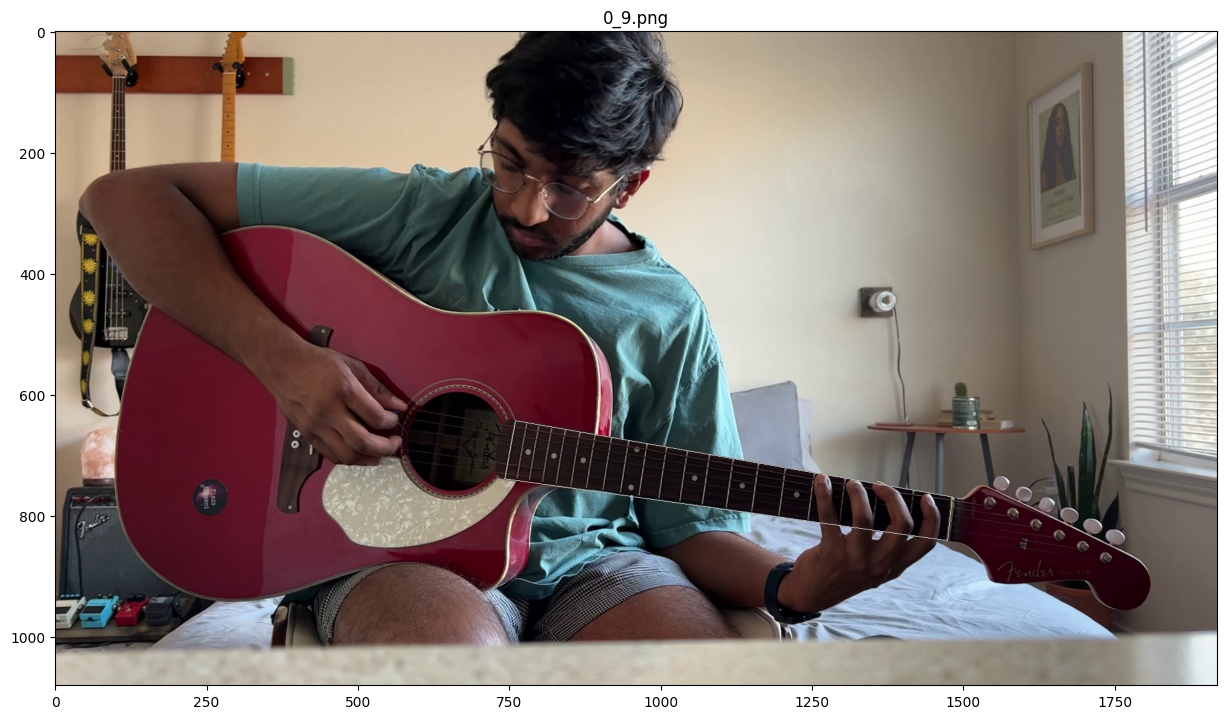

In [20]:

plt.figure(figsize=(15,15))
corners = np.stack(np.asarray([x_list, y_list], np.int32)).T
corners = corners.reshape((-1,1,2))
cv.polylines(img,[corners],True,(1,0,0))


plt.imshow(img)
plt.title(fn)
plt.show()